# Clustering analysis

In this first notebook, we conduct a k-means clustering analysis on using an included MFC mask.
Fortunately, Neurosynth includes a set of functions to make this rather easy. In this case I will use the simple neurosynth.analysis.cluster.magic function that takes care of most of the heavy lifting for you. 

By default, the magic() function performs a k-means co-activation based analysis using the same methods as our manuscript. 

First lets import some basic necessities:

In [2]:
import seaborn as sns
from nilearn import plotting as niplt
from matplotlib.colors import ListedColormap
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Next, I load a previously generated Neurosynth dataset. This dataset was generated using version 0.4 of Neurosynth and the features are 60 topics generated using latent dietrich allocation (LDA). Feel free to generate a dataset using the latest version of Neurosynth and plug it into this analysis.

In [2]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_60_0.4.pkl")

Here, I use the magic function to perform the clustering analaysis. For each N I specify, an image is generated and placed in images/. Note that I specifiy that at least 80 studies must activate each voxel to be included in the analysis to ensure a robust classification. 

The following analysis will compute co-activation between each MFC voxel and the rest of the brain (reduced into 100 PCA components), and use the resulting distance matrix for classification. Note that this step may be computationally intensive. You may use the Clusterable class in neurosynth.analysis.cluster for a more custom analysis to avoid repeating the PCA for each classification if you desire.

In [4]:
from neurosynth.analysis.cluster import magic
magic(dataset, roi_mask='mfc_mask.nii.gz', min_studies_per_voxel=80, output_dir='images/', n_clusters=3)
magic(dataset, roi_mask='mfc_mask.nii.gz', min_studies_per_voxel=80, output_dir='images/', n_clusters=9)
magic(dataset, roi_mask='mfc_mask.nii.gz', min_studies_per_voxel=80, output_dir='images/', n_clusters=12)

Next, I use nilearn's useful plotting functions to display the results on saggital and coronal slices

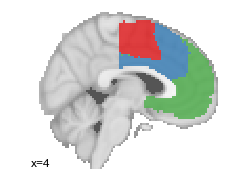

In [3]:
# Generate color palette
colors = sns.color_palette('Set1', 3)
niplt.plot_roi('images/cluster_labels_k3.nii.gz', cut_coords=[4], display_mode='x', 
             draw_cross=False, cmap = ListedColormap(colors), alpha=0.8)

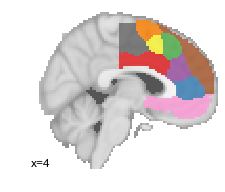

In [8]:
from plotting import nine_colors
niplt.plot_roi('images/cluster_labels_k9.nii.gz', cut_coords=[4], display_mode='x', 
             draw_cross=False, cmap = ListedColormap(nine_colors), alpha=0.8)

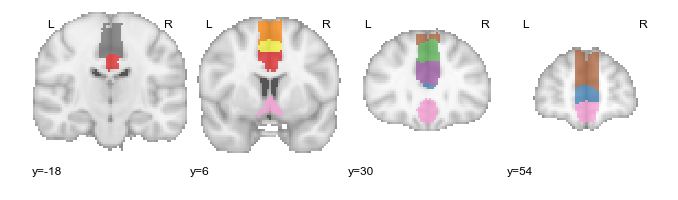

In [5]:
niplt.plot_roi('images/cluster_labels_k9.nii.gz', display_mode='y', cut_coords=np.arange(-18, 62, 24),
             draw_cross=False, cmap = ListedColormap(nine_colors), alpha=0.7)

For k = 12, it's hard to find a consistent color scheme, so I'm displaying the resulting using a randomly shuffled hls colors. Shuffle repeatedly until you can clearly perceive the different clusters

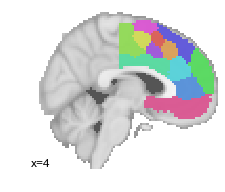

In [6]:
from random import shuffle
colors = sns.color_palette("hls", 12)
shuffle(colors)
niplt.plot_roi('images/cluster_labels_k12.nii.gz', cut_coords=[4], display_mode='x', draw_cross=False, 
             cmap = ListedColormap(colors), alpha=0.95)